In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Read csv file**

In [2]:
boston_housing = pd.read_csv("C:/Users/SUCH A MERCY HE WAS/Desktop/LIBRARY/machine-learning-master project/projects/boston_housing/housing.csv")
boston_housing.info()

print('----------------------------')
print(boston_housing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB
----------------------------
      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0


In [3]:
boston_housing.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [4]:
print("Boston housing dataset has {} data points with {} variables each.".format(*boston_housing.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [5]:
boston_housing.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [6]:
features = boston_housing.drop('MEDV',axis=1)
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [7]:
target = boston_housing['MEDV']
target.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

**Calculating the Minimum Value**

In [8]:
min_price = target.min()
min_price

105000.0

**Calculating the Maximum Value**

In [9]:
max_price = np.max(target)
max_price

1024800.0

**Calculating the Mean Value**

In [10]:
mean_price = target.mean()
mean_price

454342.9447852761

**Calculating the Median Value**

In [11]:
med_price = target.median()
med_price

438900.0

**Calculating the Standard Deviation**

In [12]:
std_price = np.std(target)
std_price

165171.13154429477

In [13]:
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(min_price)) 
print("Maximum price: ${}".format(max_price))
print("Mean price: ${}".format(mean_price))
###print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Standard deviation of prices: $165171.13154429477


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

<function matplotlib.pyplot.show(*args, **kw)>

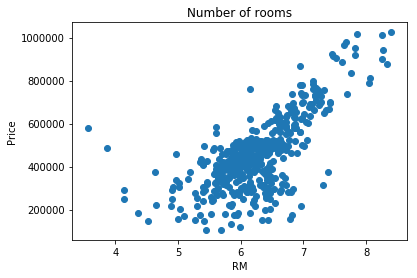

In [14]:
plt.scatter(features['RM'], target)
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('Number of rooms')
plt.show

**Answer**

- The Average number of rooms which is denoted by **RM** have more roles to play in the worth of a home so far we are not given the size of each room. I believe the higher the **RM** the higher the worth of a particular home. Take for example : If a home with 5 rooms cost $360, definately a home with 8 rooms should cost more than that. **Refer to the scatter plot above.**

<function matplotlib.pyplot.show(*args, **kw)>

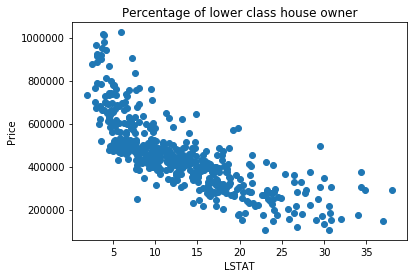

In [15]:
plt.scatter(features['LSTAT'], target)
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.title('Percentage of lower class house owner')
plt.show

- **LSTAT** value (percentage of lower class workers) of 50 will worth less than a **LSTAT** value of 20. It is a practical believe that a home that consist higher percentage of lower class workers will lack some basic facilities which reduces the worth, compare to a home with higher percentage of middle class and higher class workers which are well equiped with many facilities.

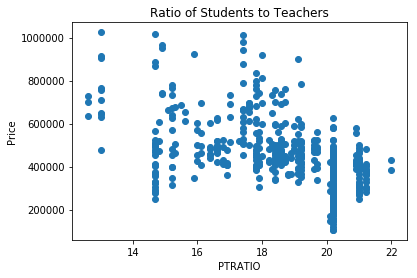

In [16]:
plt.scatter(features['PTRATIO'], target)
plt.xlabel('PTRATIO')
plt.ylabel('Price')
plt.title('Ratio of Students to Teachers')
plt.show()

- A home with **PTRATIO** value of 15 should worth less than a **PTRATIO** value of 5. If the quality of education is high,the neighourhood will be more sought after, which result to the increase in price of homes.

**Creating a Model**

In [32]:
X =np.array(features)
y =np.array(target)


#Training and Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state = 100)
X

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_test

array([ 621600.,  352800.,  672000.,  812700.,  485100.,  478800.,
        405300.,  781200.,  117600.,  474600.,  470400.,  323400.,
        289800., 1018500.,  396900.,  506100.,  485100.,  428400.,
        661500.,  105000.,  147000.,  315000.,  441000.,  455700.,
        441000.,  392700.,  151200.,  264600.,  203700.,  386400.,
        252000.,  369600.,  199500.,  373800.,  401100.,  422100.,
        401100.,  245700.,  632100.,  266700.,  174300.,  663600.,
        451500.,  407400.,  514500.,  289800.,  795900.,  258300.,
        480900.,  525000.,  636300.,  756000.,  319200.,  415800.,
        739200.,  184800.,  321300.,  609000.,  617400.,  300300.,
        399000.,  312900.,  436800.,  438900.,  518700.,  867300.,
        407400.,  695100.,  151200.,  304500.,  323400.,  285600.,
        357000.,  247800.,  501900.,  449400.,  466200.,  569100.,
        157500.,  455700.,  132300.,  214200.,  359100.,  304500.,
        384300.,  438900.,  294000.,  422100.,  518700.,  6993

In [27]:
y_pre=lr.predict(X_test)
y_pre

array([605399.93768433, 361722.28189822, 631500.71706083, 722086.78490721,
       507322.27716665, 539793.96337549, 390967.57675914, 617562.35331287,
       251897.75746277, 526576.38723328, 379355.97037582, 380269.85524117,
       -34578.44178027, 772020.15527837, 349964.12292284, 579197.13159528,
       197564.82531697, 408100.32227009, 599642.78154329, 163047.99562179,
       230602.01882794, 404819.0536085 , 453456.77152921, 430299.87431103,
       447205.5338296 , 432725.90953228, 351899.30184926, 383990.32886559,
       176104.11675161, 339525.11514983, 208713.93623855, 386674.91449853,
       316019.76630807, 368299.57837225, 336546.37961624, 483401.54453198,
       310287.00881484, 393313.03647304, 565586.11520362, 331938.7173221 ,
       268413.70260047, 628497.4335895 , 505865.50931384, 519306.37448356,
       591906.36810718,  69246.50364934, 635902.38936329, 232170.22646065,
       525081.70643615, 487810.75101378, 695218.38303645, 716554.07227524,
       334292.40602988, 4

**Performance Metric**

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.7456290987498793

In [40]:
client_data = [[5, 17, 15], # Client 1
               [4, 10, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(lr.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $366,763.08
Predicted selling price for Client 2's home: $209,145.83
Predicted selling price for Client 3's home: $847,592.65
